# All localsearch algorithms examples + plotting

## imports

In [1]:
# read data
from lclpy.io.tsplib import read_tsplib

# move functions
from lclpy.localsearch.move.tsp_array_swap import TspArraySwap
from lclpy.localsearch.move.array_reverse_order import ArrayReverseOrder
from lclpy.localsearch.move.multi_neighbourhood import MultiNeighbourhood

# evaluation function
from lclpy.evaluation.tsp_evaluation_function import TspEvaluationFunction

# Problem class
from lclpy.problem.array_problem import ArrayProblem

# termination functions
from lclpy.termination.min_temperature_termination_criterion import MinTemperatureTerminationCriterion
from lclpy.termination.max_seconds_termination_criterion import MaxSecondsTerminationCriterion

# simulated annealing
from lclpy.localsearch.simulatedannealing.simulated_annealing import SimulatedAnnealing
from lclpy.localsearch.simulatedannealing.geometric_cooling_function import GeometricCoolingFunction
from lclpy.localsearch.simulatedannealing.cnst_iterations_temp_function import CnstIterationsTempFunction

# steepest descent 
from lclpy.localsearch.steepestdescent.steepest_descent import SteepestDescent

# tabu search
from lclpy.localsearch.tabusearch.sum_diff_state import SumDiffState
from lclpy.localsearch.tabusearch.tabu_search import TabuSearch

# variable neighbourhood search
from lclpy.localsearch.vns.variable_neighbourhood import VariableNeighbourhood


# plotting
from lclpy.plot.plot import plot, iterations_plot


In [2]:
# matplotlib init (only needed when using matplotlib)

%matplotlib inline
import matplotlib.pyplot as plt

## Reading the data

In [3]:
data = read_tsplib('data/gr48.tsp')
distance_matrix = data[0]
print(distance_matrix)

size = distance_matrix.shape[0]
print(size)

[[  0 593 409 ... 235 369 121]
 [593   0 258 ... 371 205 570]
 [409 258   0 ... 187 289 386]
 ...
 [235 371 187 ...   0 149 212]
 [369 205 289 ... 149   0 347]
 [121 570 386 ... 212 347   0]]
48


## simulated annealing

In [4]:
move_1 = TspArraySwap(size)

evaluation_1 = TspEvaluationFunction(distance_matrix, move_1)

problem_1 = ArrayProblem(evaluation_1, move_1, size)

termination_criterion_1 = MinTemperatureTerminationCriterion()

cooling_func = GeometricCoolingFunction(0.95)
i_for_temp = CnstIterationsTempFunction(1500)

algorithm_1 = SimulatedAnnealing(problem_1, termination_criterion_1,
                                 cooling_func, i_for_temp, benchmarking=True, logging=False)
results_1 = algorithm_1.run()
print(results_1)

Results(best_order=array([ 0, 12, 15, 47, 28, 43, 40, 44,  1, 34, 39, 38, 41, 19, 37, 29,  3,
       18,  2, 24, 42, 36, 23, 30, 11,  9, 14, 25,  5, 10, 35, 13,  8,  7,
       32,  4, 31, 26, 16, 20, 21, 46, 22, 33, 17, 45, 27,  6]), best_value=5910, data=Data(time=array([0.00000000e+00, 6.80000003e-05, 9.19000004e-05, ...,
       1.18325590e+00, 1.18405220e+00, 1.18627910e+00]), iteration=array([     0,      0,      1, ..., 155601, 155704, 156000]), temperature=array([2000.        , 2000.        , 2000.        , ...,   10.15222748,
         10.15222748,    9.64461611]), value=array([19837, 20611, 20976, ...,  5946,  5959,  5959]), best_value=array([19837, 19837, 19837, ...,  5910,  5910,  5910])))


### simulated annealing plotting data with lspy's plot function

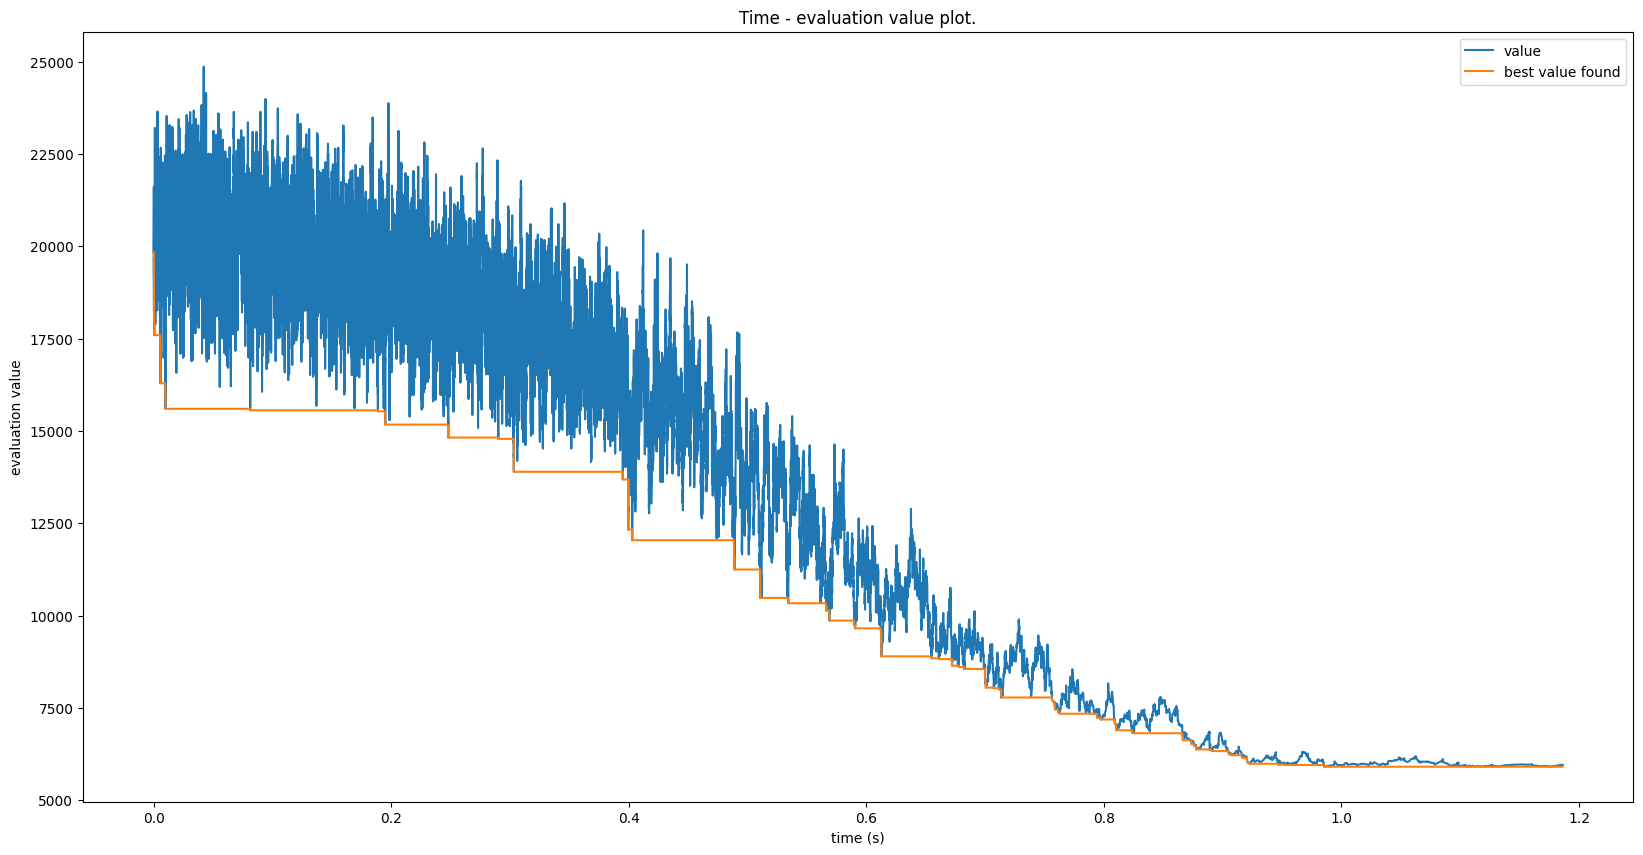

In [5]:
# value-time plot

plot(results_1.data)

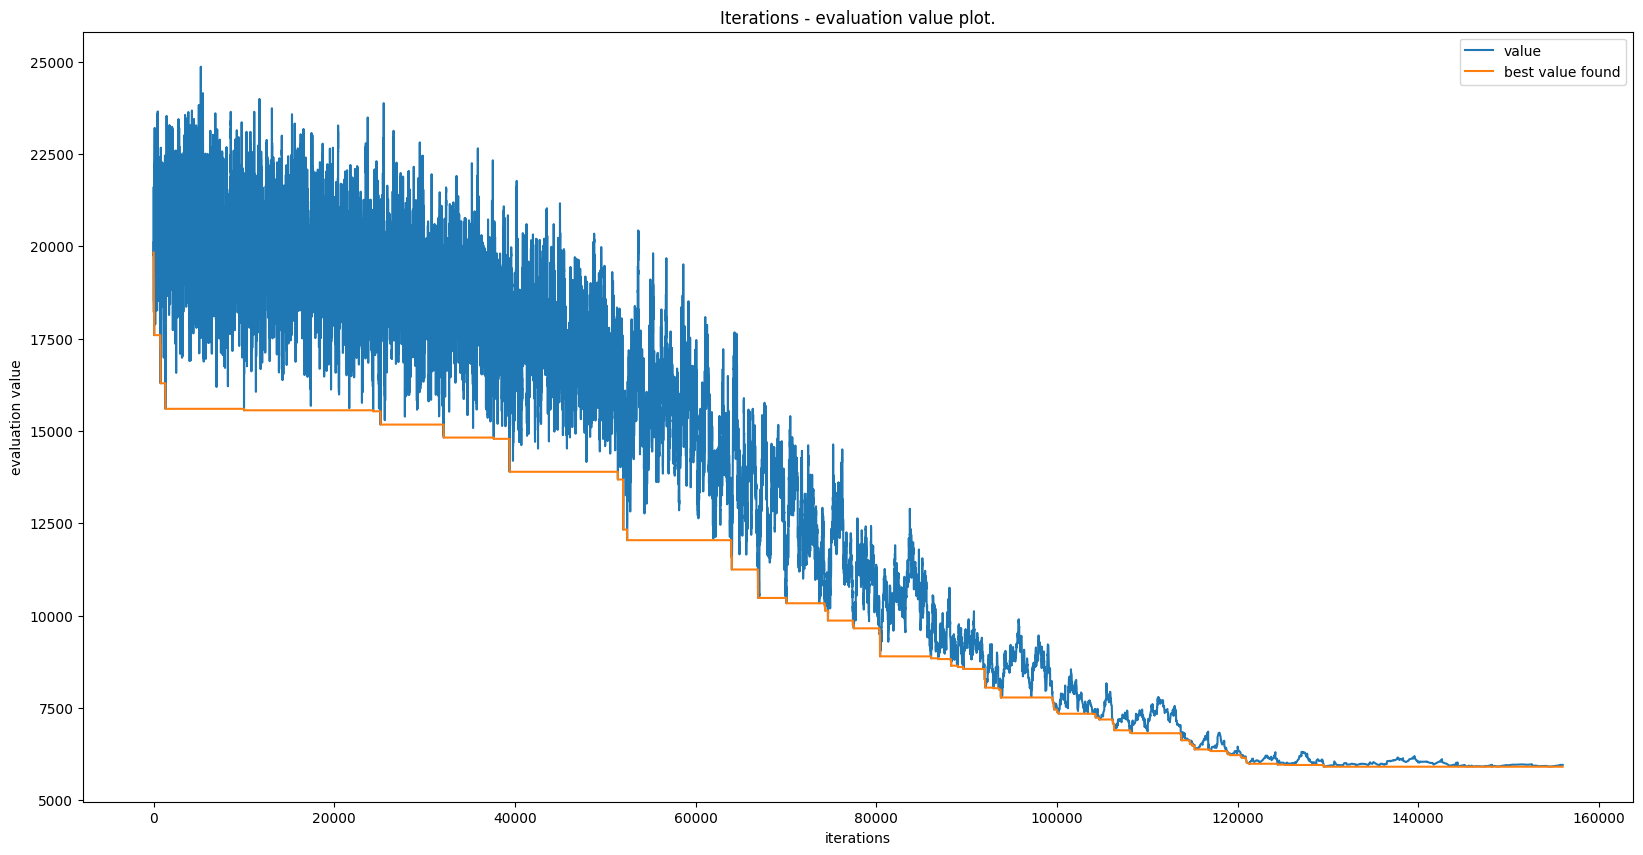

In [6]:
# value-iterations plot

iterations_plot(results_1.data)

### simulated annealing plotting data with matplotlib

In [7]:
# getting data from results (only used for plotting with matplotlib)

data = results_1.data

time = data.time
iterations = data.iteration
temperature = data.temperature
values = data.value
best_values = data.best_value

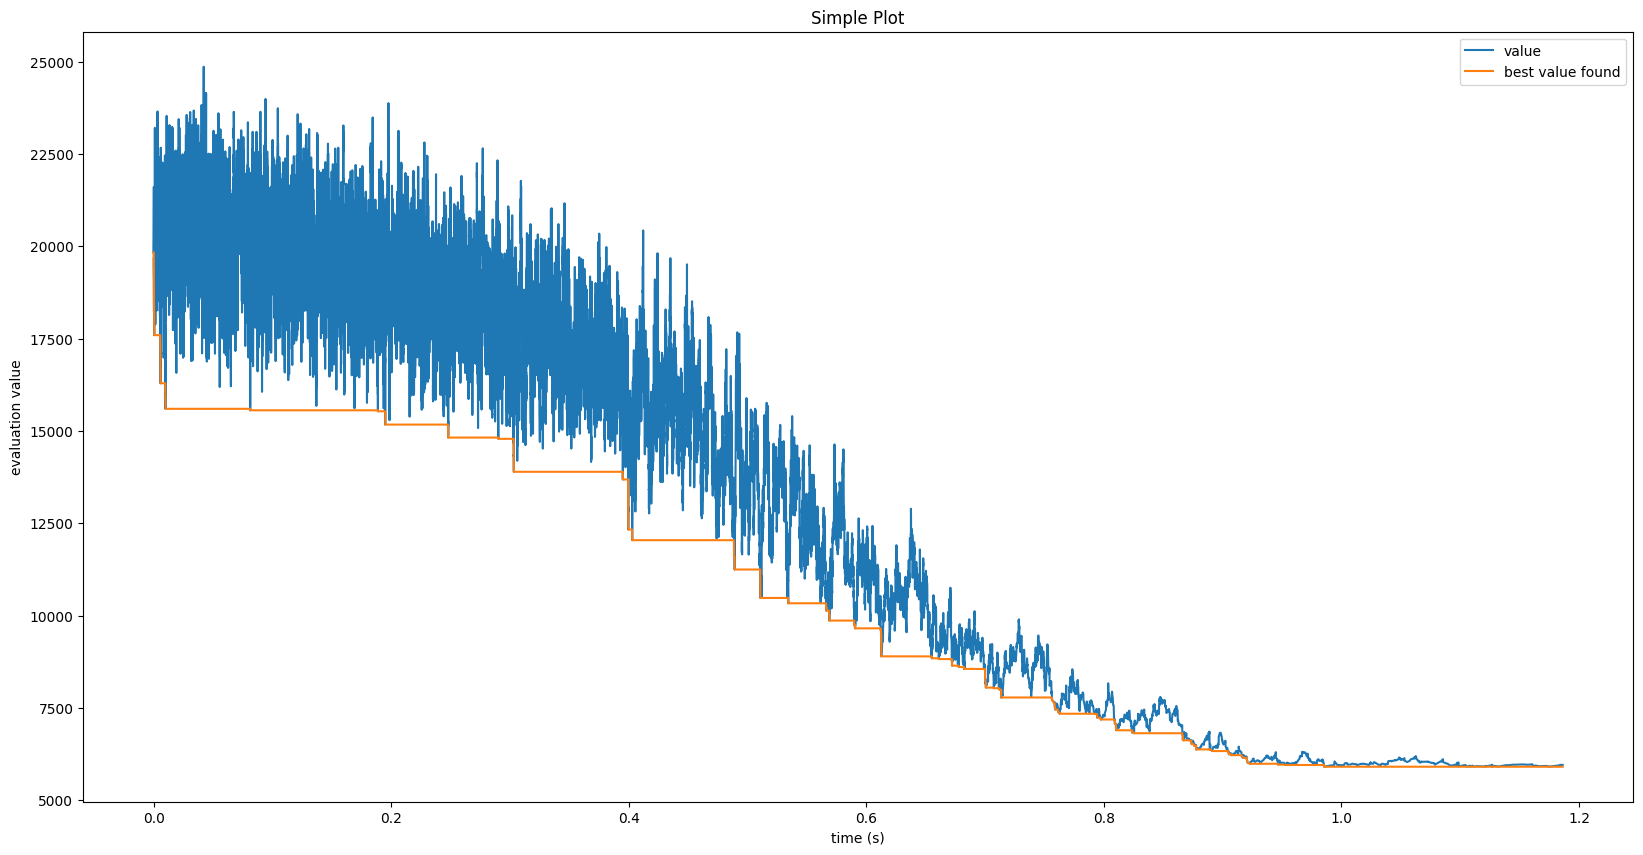

In [8]:
# plotting a value-time plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(time, values,label='value')
plt.plot(time, best_values, label='best value found')

plt.xlabel('time (s)')
plt.ylabel('evaluation value')

plt.title("Simple Plot")

plt.legend()

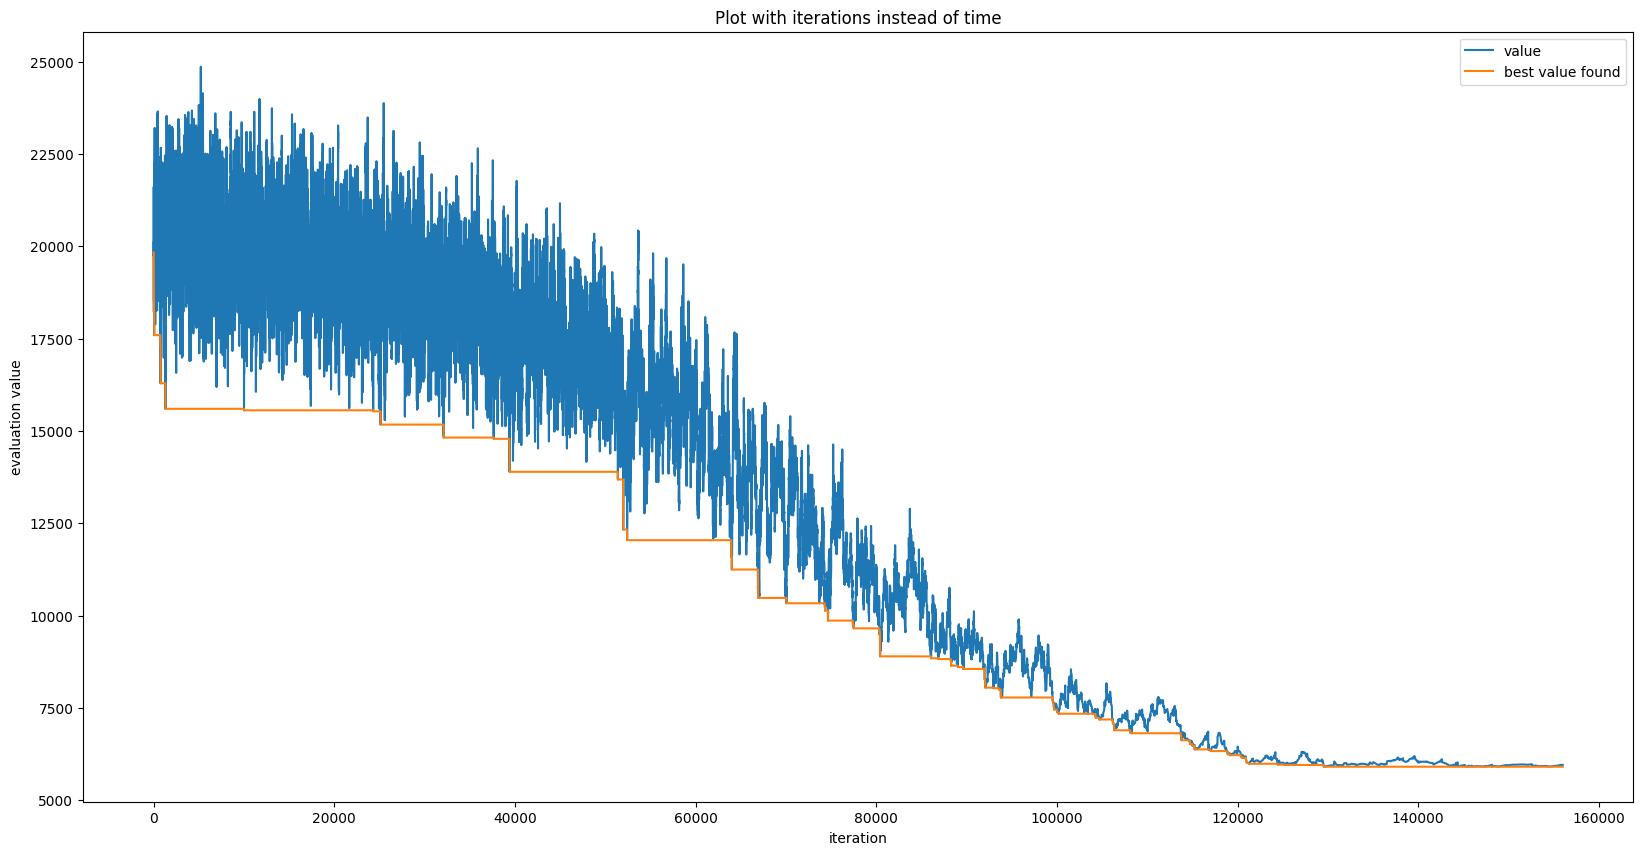

In [9]:
# plotting a value-iteration plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(iterations, values,label='value')
plt.plot(iterations, best_values, label='best value found')

plt.xlabel('iteration')
plt.ylabel('evaluation value')

plt.title("Plot with iterations instead of time")

plt.legend()

Text(0.5, 1.0, 'Temperature in function of the amount of iterations')

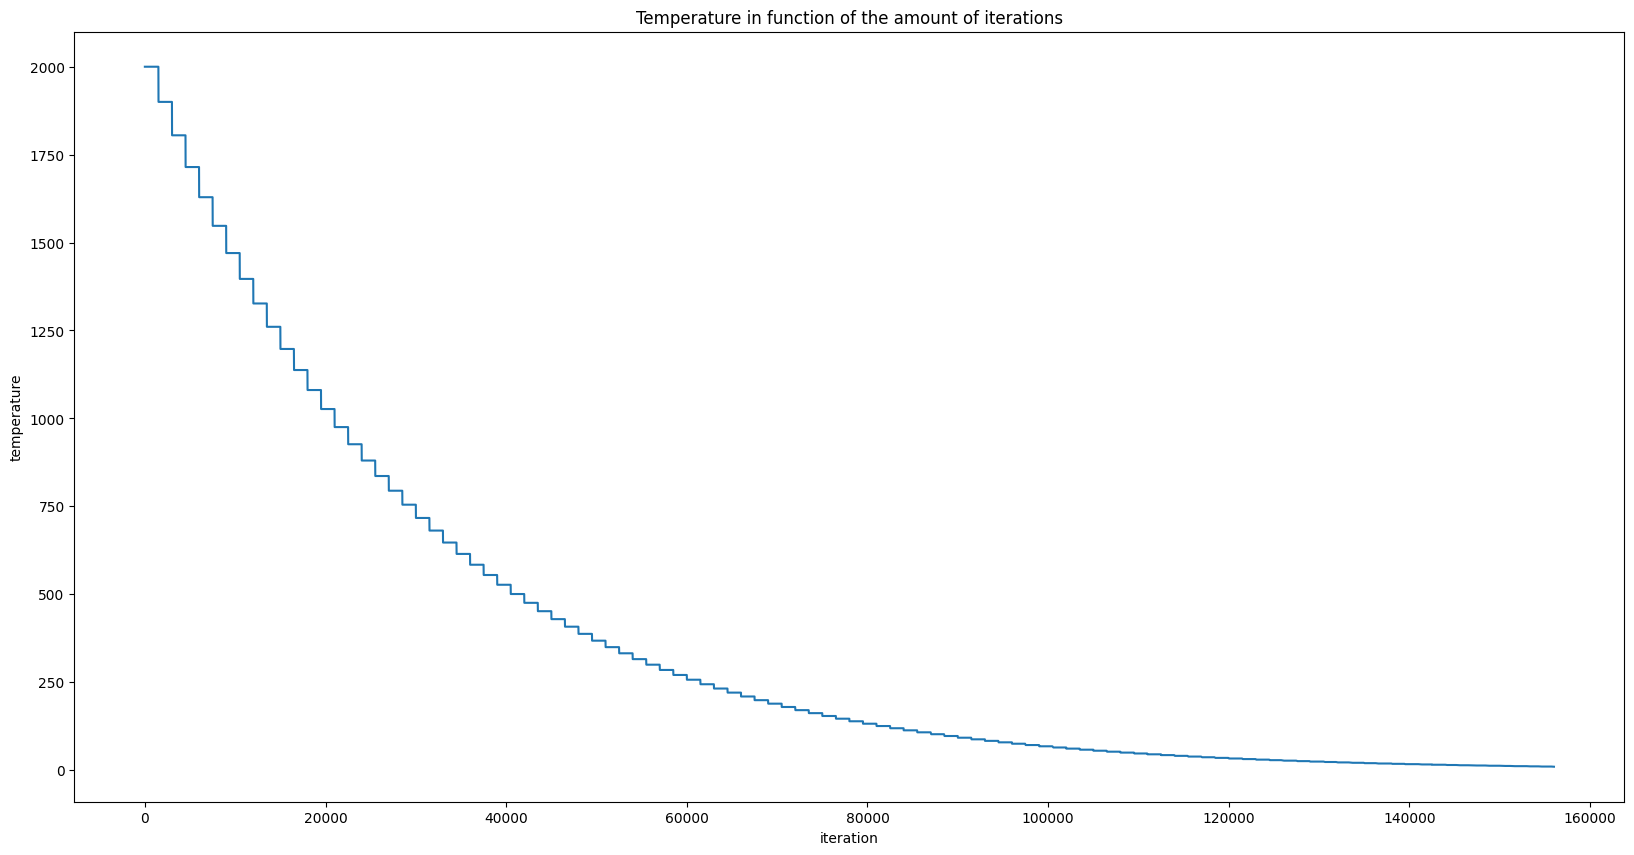

In [10]:
# plotting a temperature-iteration plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(iterations, temperature)

plt.xlabel('iteration')
plt.ylabel('temperature')

plt.title("Temperature in function of the amount of iterations")

## steepest descent

In [11]:
move_2 = TspArraySwap(size)

evaluation_2 = TspEvaluationFunction(distance_matrix, move_2)

problem_2 = ArrayProblem(evaluation_2, move_2, size)


algorithm_2 = SteepestDescent(problem_2, benchmarking=True, logging=False)
results_2 = algorithm_2.run()
print(results_2)

Results(best_order=array([ 0, 33, 18,  3,  2, 25,  7, 21,  8, 13, 35, 10,  5, 20, 16, 26, 31,
       46,  1, 19, 37, 29, 24, 40, 43, 28, 12, 15, 47, 14, 32,  4, 30, 11,
        9, 23, 36, 39, 38, 41, 34, 44, 42, 22, 17, 45, 27,  6]), best_value=7073, data=Data(time=array([0.       , 0.0051634, 0.0102805, 0.0153808, 0.0203364, 0.0252728,
       0.0304227, 0.0356658, 0.0406091, 0.0453701, 0.0502359, 0.0551098,
       0.0602564, 0.0653587, 0.0702843, 0.0751524, 0.0799782, 0.0849426,
       0.0897429, 0.0949041, 0.100128 , 0.1049004, 0.109718 , 0.1146496,
       0.119548 , 0.1244434, 0.1294057, 0.1342922, 0.1390225, 0.1437431,
       0.1485565, 0.1532907, 0.1580592, 0.1628876, 0.1682324, 0.1729901,
       0.1779972, 0.1830826, 0.1880939]), iteration=array([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37]), value=array([19837, 18381, 17226, 16206, 15138, 14149, 13407, 127

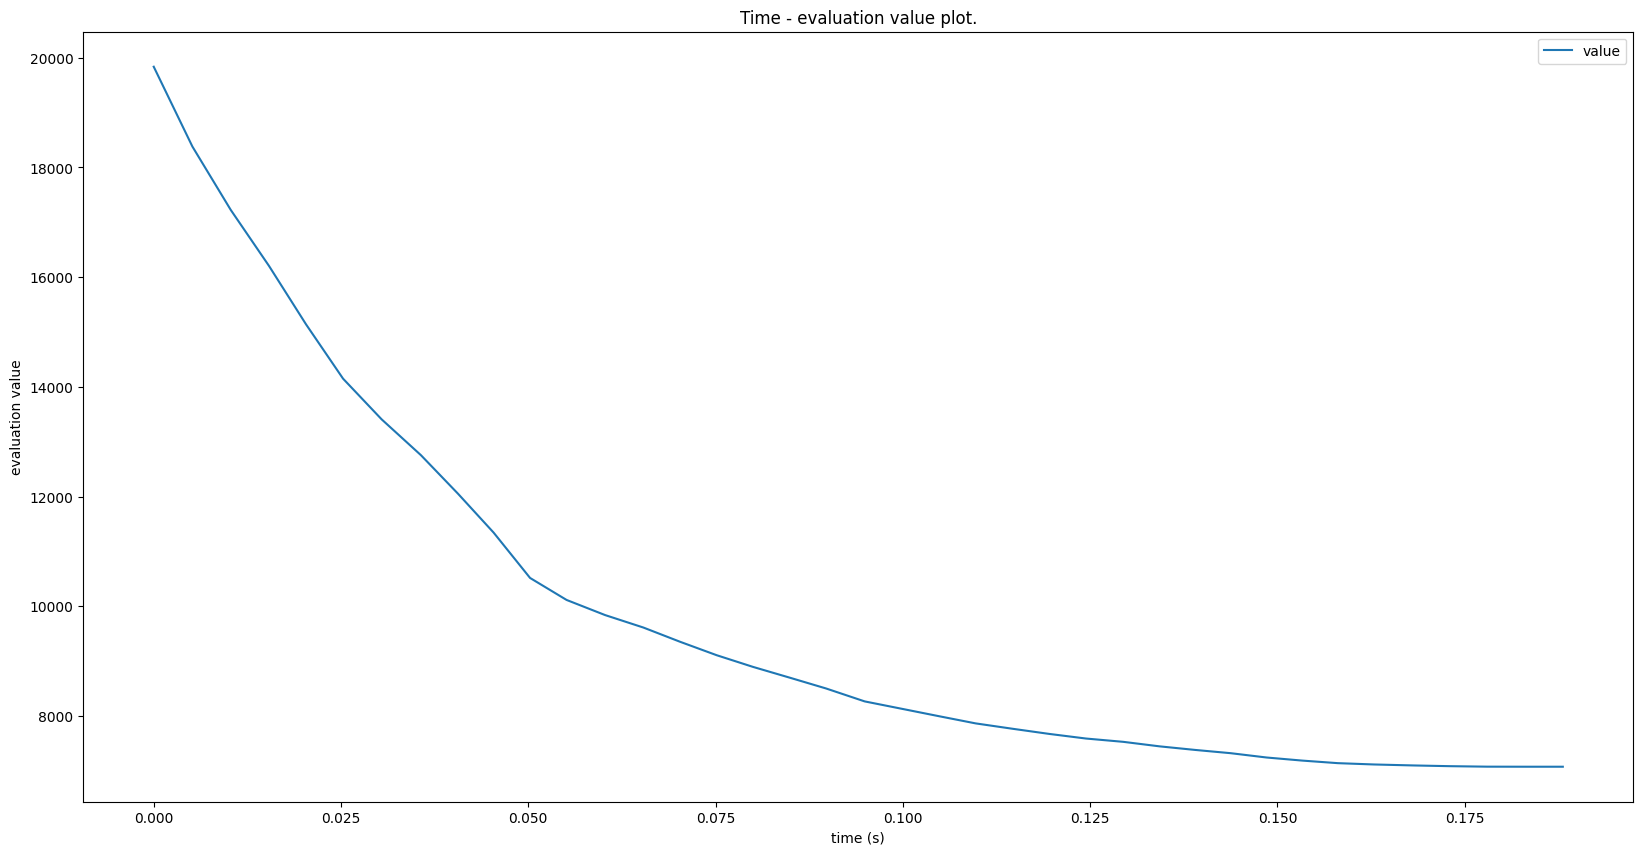

In [12]:
# value-time plot

plot(results_2.data)

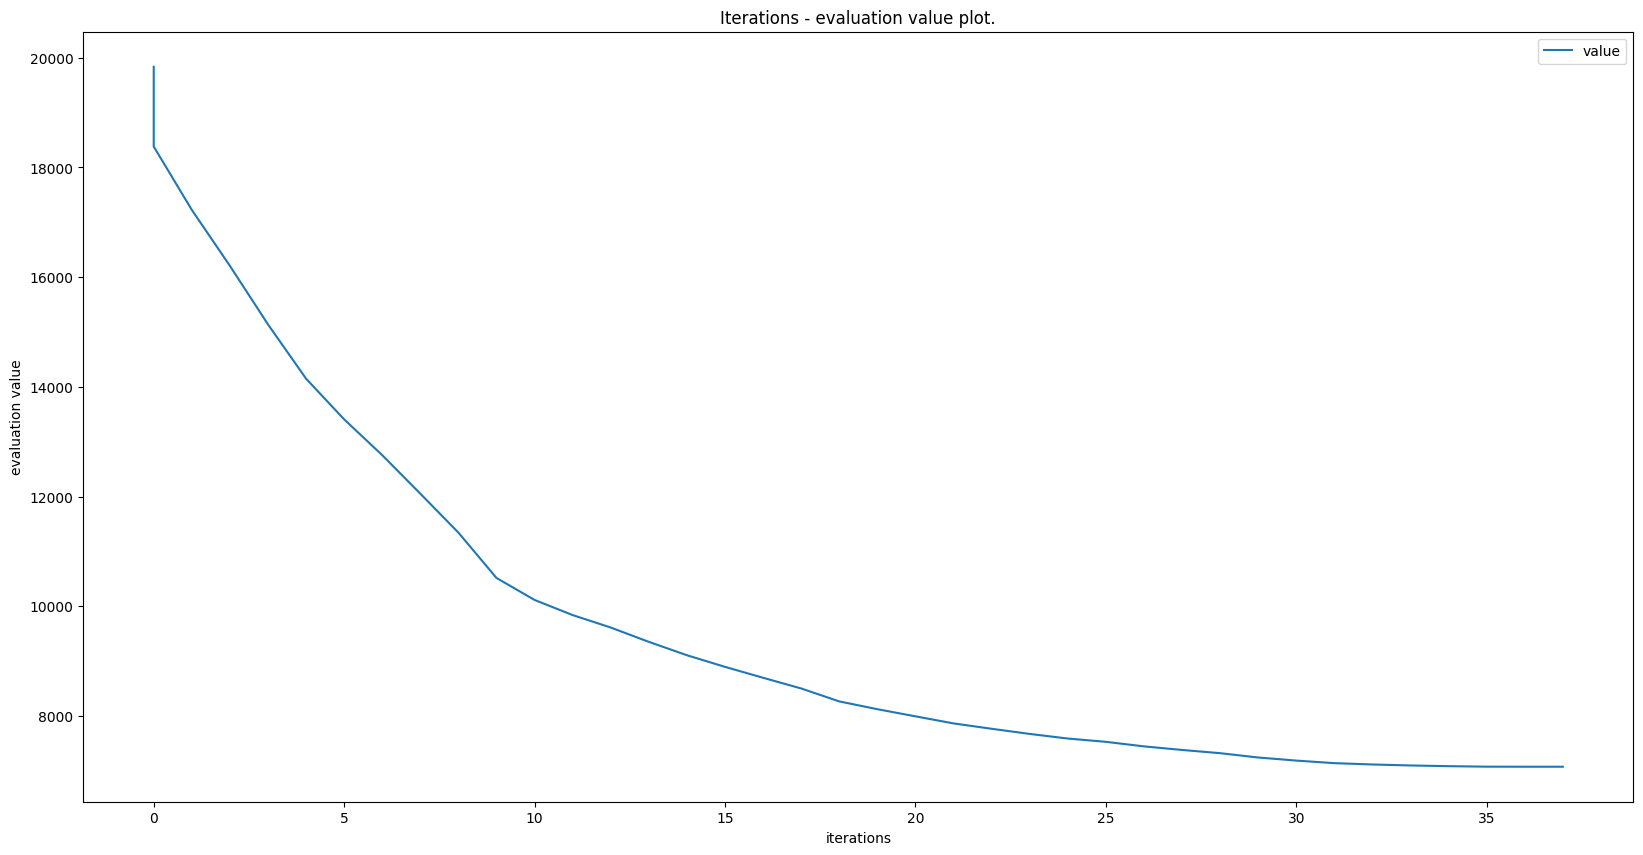

In [13]:
# value-iterations plot

iterations_plot(results_2.data)

## tabu search

In [14]:
move_3 = TspArraySwap(size)

evaluation_3 = TspEvaluationFunction(distance_matrix, move_3)

problem_3 = ArrayProblem(evaluation_3, move_3, size)

termination_3 = MaxSecondsTerminationCriterion(10)

diff_state_3 = SumDiffState()

algorithm_3 = TabuSearch(problem_3, termination_3, diff_state_3, 11, benchmarking=True, logging=False)
results_3 = algorithm_3.run()
print(results_3)

Results(best_order=array([ 0,  2, 18,  3, 29,  1, 46, 25,  5, 13,  8, 35, 10, 15, 47, 12,  6,
       27, 45, 33, 24, 22, 17,  7, 21, 20, 16, 26, 31,  4, 11,  9, 30, 32,
       14, 23, 36, 39, 38, 41, 34, 19, 37, 44, 42, 40, 43, 28]), best_value=6294, data=Data(time=array([0.00000000e+00, 5.06050000e-03, 9.93660000e-03, ...,
       9.99867410e+00, 1.00038000e+01, 1.00038057e+01]), iteration=array([   0,    0,    1, ..., 1954, 1955, 1956]), value=array([19837, 18381, 17226, ...,  6425,  6410,  6410]), best_value=array([19837, 18381, 17226, ...,  6294,  6294,  6294])))


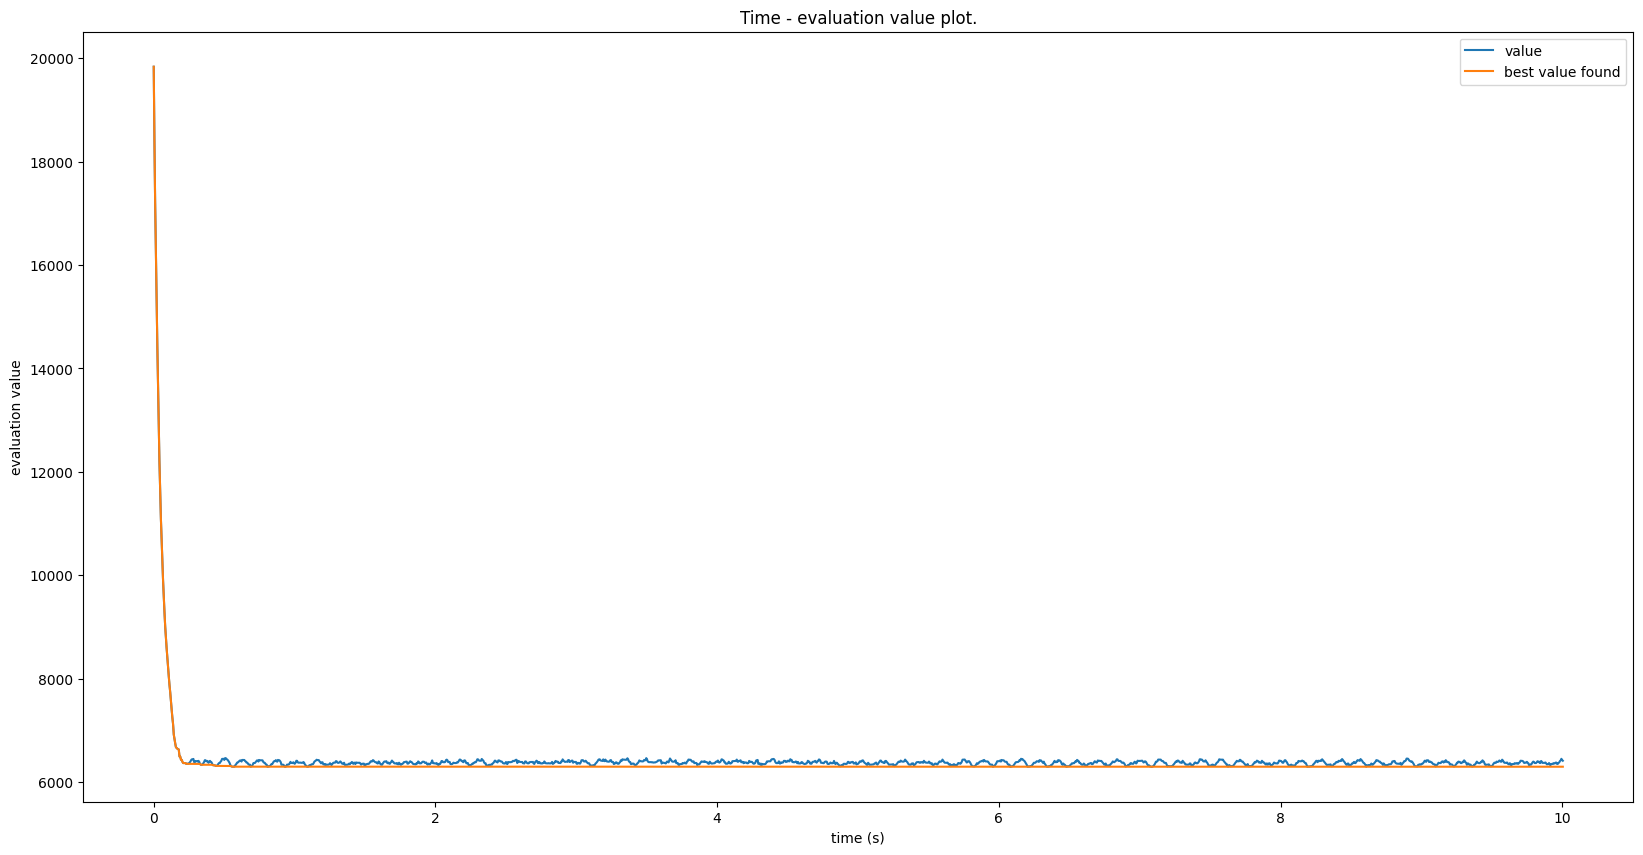

In [15]:
# value-time plot

plot(results_3.data)

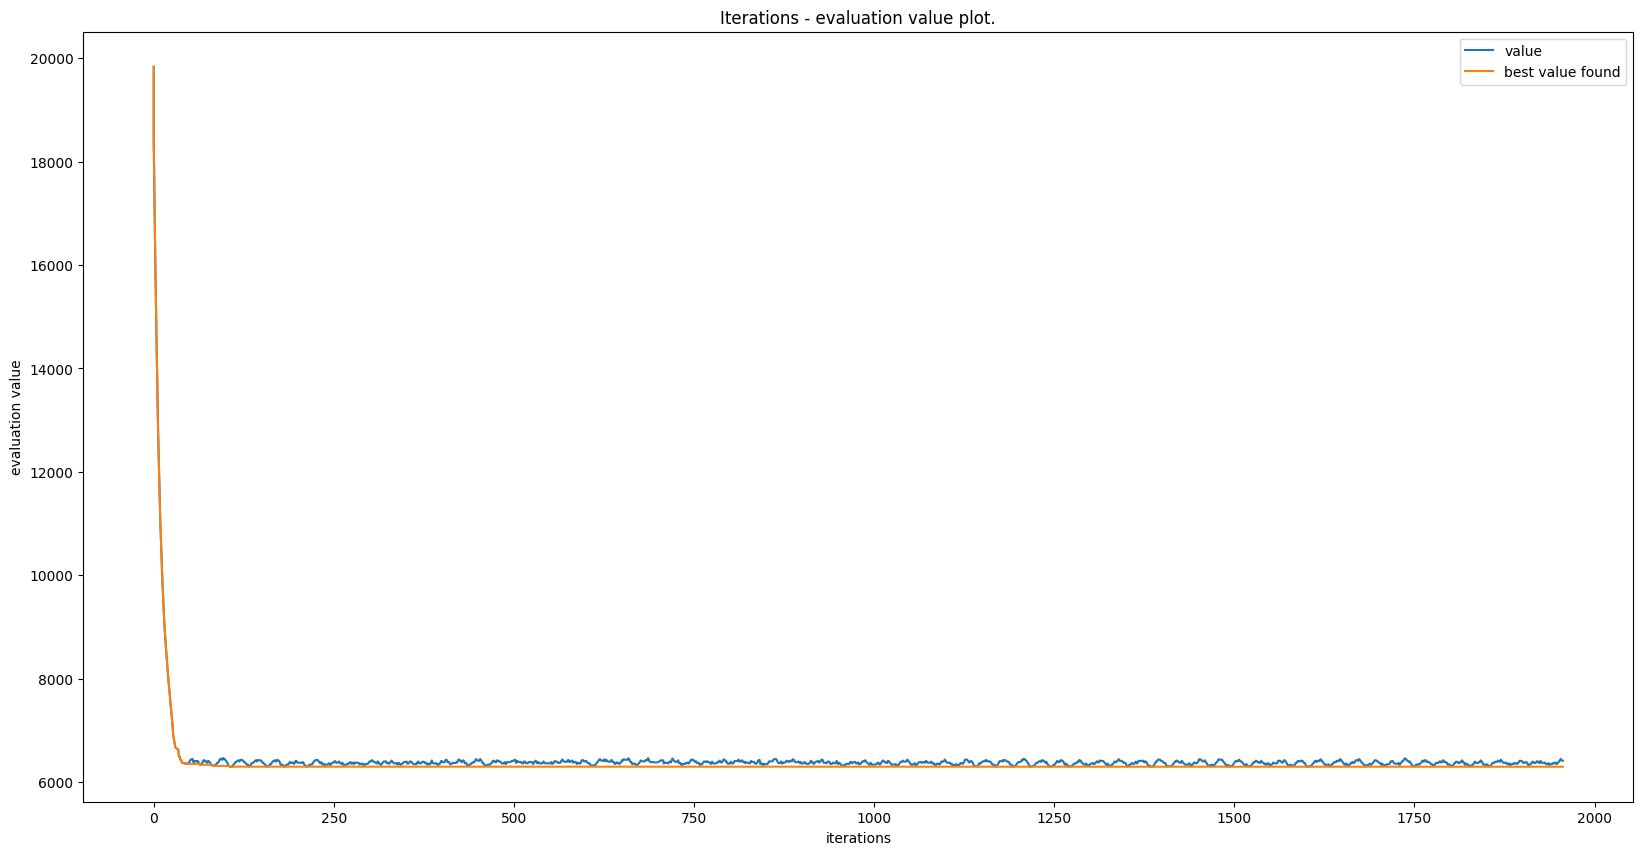

In [16]:
# value-iterations plot

iterations_plot(results_3.data)

## variable neighbourhood search

In [17]:
move_a = TspArraySwap(size)
move_b = ArrayReverseOrder(size)

moves = [move_a, move_b]

move_4 = MultiNeighbourhood(moves)

evaluation_4 = TspEvaluationFunction(distance_matrix, move_4)

problem_4 = ArrayProblem(evaluation_4, move_4, size)


algorithm_4 = VariableNeighbourhood(problem_4, benchmarking=True, logging=False)
results_4 = algorithm_4.run()
print(results_4)

Results(best_order=array([ 6, 28,  0, 12, 47, 15, 10, 35,  5, 13,  8, 20, 16, 26, 31, 21,  7,
       25, 14, 32,  4, 30, 11,  9, 23, 36, 46, 17, 45, 33, 22, 42, 44,  1,
       39, 38, 41, 34, 19, 37, 29,  3, 18,  2, 24, 40, 43, 27]), best_value=5097, data=Data(time=array([0.       , 0.0054063, 0.0103383, 0.0151673, 0.0203223, 0.0254133,
       0.0306982, 0.0364909, 0.0413813, 0.0462334, 0.0510604, 0.0563076,
       0.0612674, 0.0662596, 0.071194 , 0.0761026, 0.0809494, 0.0858881,
       0.090907 , 0.0957914, 0.1006569, 0.1056434, 0.1104484, 0.1152643,
       0.1202468, 0.1251613, 0.1301218, 0.1350237, 0.1399167, 0.1449291,
       0.1498124, 0.1547186, 0.1598217, 0.1647234, 0.1697467, 0.1747386,
       0.1797078, 0.1845542, 0.2131113, 0.2415148, 0.2468479, 0.2529803,
       0.2578614, 0.263121 , 0.2680641, 0.2731319, 0.3016405, 0.3068783,
       0.311946 , 0.3167707, 0.3232699, 0.328453 , 0.3334173, 0.3388895,
       0.3670152, 0.3722231, 0.3772136, 0.4060734, 0.4342457, 0.4629493,
    

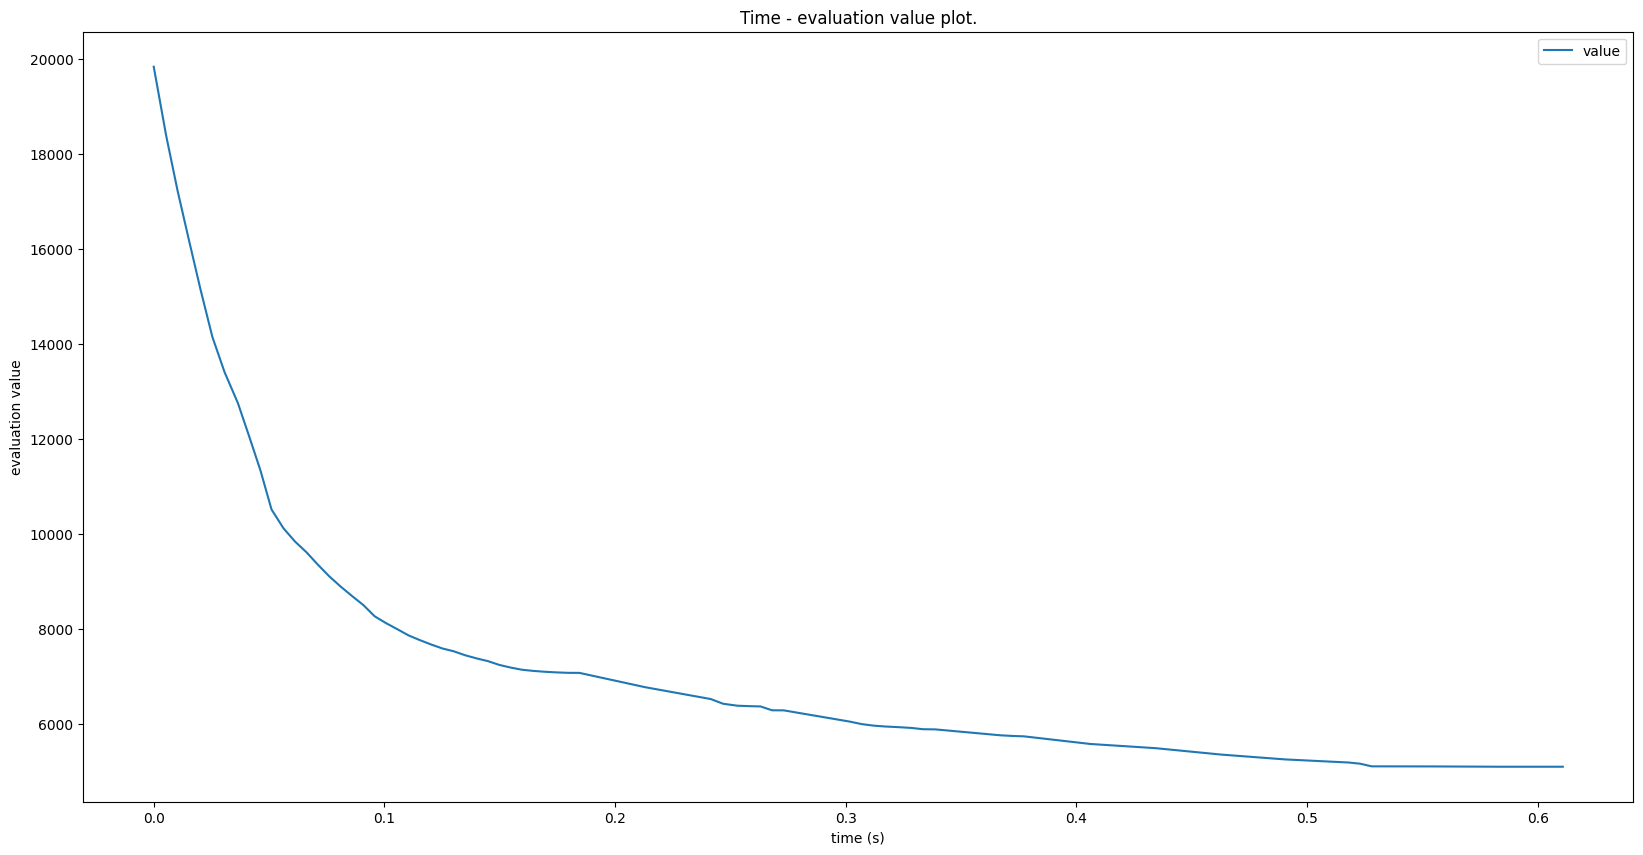

In [18]:
# value-time plot

plot(results_4.data)

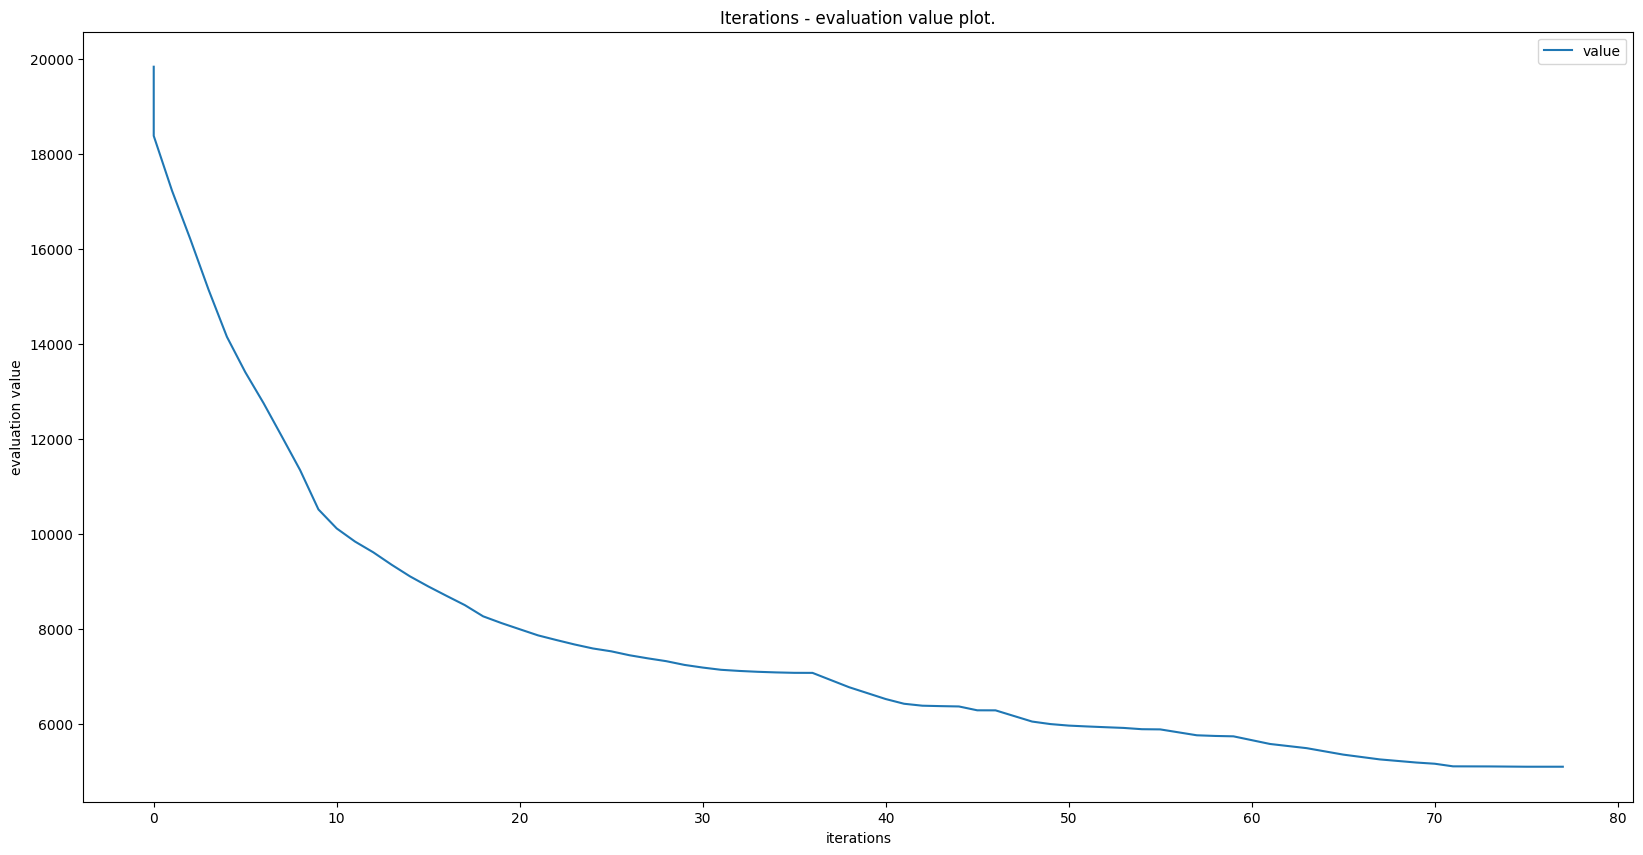

In [19]:
# value-iterations plot

iterations_plot(results_4.data)